In [2]:
import os
import sys
sys.path.append("..")  # Add root directory to Python path

import pandas as pd
import yfinance as yf
from configure import FRED_API_KEY
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr

# Setup paths
os.makedirs('../data', exist_ok=True)
os.makedirs('../visuals', exist_ok=True)

In [3]:
# Fetch 5-year data for tech stocks
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
data = yf.download(tech_stocks, period='5y', auto_adjust=True)['Close']
data.to_csv('../data/tech_stocks.csv')
data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-05-04,71.143791,115.799500,65.830269,171.181824,50.745998
2020-05-05,72.211563,115.889999,67.130051,173.019638,51.214001
2020-05-06,72.956619,117.563004,66.951408,174.723404,52.172001
2020-05-07,73.711334,118.380501,68.138237,175.738007,52.002666
2020-05-08,75.465790,118.980499,68.887657,176.771713,54.627998


In [4]:
data.tail()

Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2025-04-28,210.139999,187.699997,160.610001,391.160004,285.880005
2025-04-29,211.210007,187.389999,160.160004,394.040009,292.029999
2025-04-30,212.500000,184.419998,158.800003,395.260010,282.160004
2025-05-01,213.320007,190.199997,161.300003,425.399994,280.519989
2025-05-02,205.350006,189.979996,164.029999,435.279999,287.209991


In [8]:
from pandas_datareader import fred

fed_rate = pdr.get_data_fred(
    'FEDFUNDS',
    start=data.index.min().strftime('%Y-%m-%d'),
    end=data.index.max().strftime('%Y-%m-%d'),
    
)
fed_rate.to_csv('../data/fed_funds_rate.csv')
fed_rate.head()

,FEDFUNDS
DATE,
2020-06-01,0.08
2020-07-01,0.09
2020-08-01,0.10
2020-09-01,0.09
2020-10-01,0.09


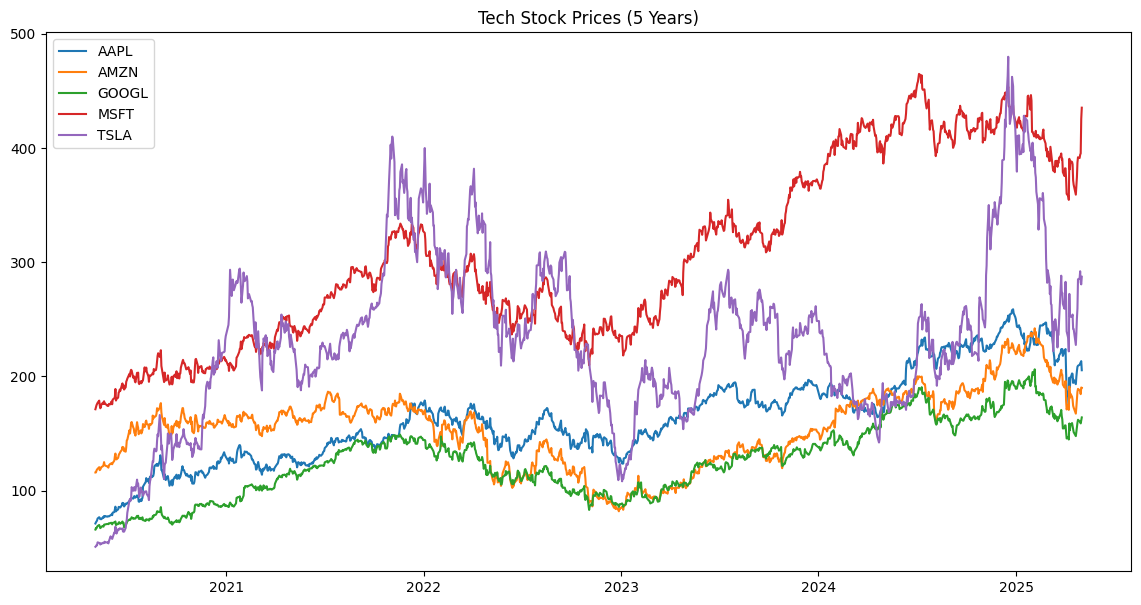

In [9]:
# Plot tech stock prices
plt.figure(figsize=(14, 7))
for stock in data.columns:
    plt.plot(data.index, data[stock], label=stock)
plt.title('Tech Stock Prices (5 Years)')
plt.legend()
plt.savefig('../visuals/price_trends.png', bbox_inches='tight')
plt.show()